
# **Keras - Autoencoders**

---

Building Autoencoders in Keras.

Tutorial Credit - https://blog.keras.io/building-autoencoders-in-keras.html 

An autoencoder is an unsupervised machine learning algorithm. In our example here it takes an image as input and then tries to reconstruct that image using less information.

They do this by projecting higher dimensional data to a lower dimension (similar to Principal Component Analysis) by keeping the feautres of most importance. This is called the latent space. 

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1522830223/AutoEncoder_kfqad1.png)


### **An Autoencoder is comprised of these two Networks**

**Encoder**: compresses/downsamples the input image into a lesser number of bits. This lesser number of bits is called the latent-space or bottleneck. 

**Decoder**: tries to reconstruct the input using only the encoding of the input. If the decoder can reconstruct the image accurately from the output of the encoder you have a properly functioning encoder (able to produce good encodings) and decoder system.

## **1. Building a Helper Functions**


In [ ]:
# Import and creating some helper functions
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist


# Normalizes the supplied array and reshapes it into the appropriate format.
def preprocess(array):

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


# Adds random noise to each image in the supplied array.
def noise(array):

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
                  loc=0.0, scale=1.0, size=array.shape)

    return np.clip(noisy_array, 0.0, 1.0)


# Displays ten random images from each one of the supplied arrays.
def display(array1, array2):
    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))

    for i, (image1, image2) in enumerate(zip(images1, images2)):

        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

## **2. Load and preprocess our MNIST Dataset**


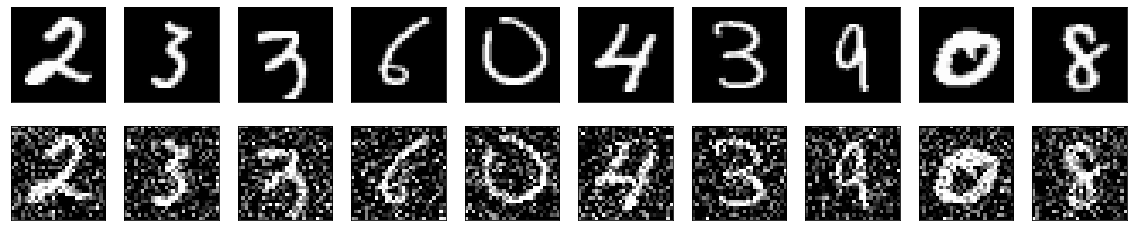

In [ ]:
# Since we only need images from the dataset to encode and decode, we won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

## **3. Now let's also create our autoencoder model**


We are going to use the Functional API to build our convolutional autoencoder.

In [ ]:
# Our input shape is 28 x 28 x 1
input = layers.Input(shape=(28, 28, 1))

# The Encoder Model
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# The Decoder Model
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder - Note it is the entire concatenation of the encoder and decoder
autoencoder = Model(input, x)

# Define the optimizer and loss function
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Print the model summery
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

## **4. Train our autoencoder** 

In [ ]:
# We use train_data as both our input data and target 
# We use test_data as both our input of validatiton data
autoencoder.fit(x=train_data,
                y=train_data,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(test_data, test_data),)

Epoch 1/50
469/469 [==============================] - 14s 10ms/step - loss: 0.1371 - val_loss: 0.0727
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0712 - val_loss: 0.0692
Epoch 3/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0689 - val_loss: 0.0677
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0678 - val_loss: 0.0670
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0670 - val_loss: 0.0663
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0665 - val_loss: 0.0659
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0661 - val_loss: 0.0655
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0658 - val_loss: 0.0652
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0655 - val_loss: 0.0650
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0652 - val_loss: 0.0

## **5. Encoding the image**

In [ ]:
autoencoder.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_1')>

In [ ]:
autoencoder.get_layer('max_pooling2d_1').output

<KerasTensor: shape=(None, 7, 7, 32) dtype=float32 (created by layer 'max_pooling2d_1')>

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('max_pooling2d_1').output)

In [ ]:
encoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
Total params: 9,568
Trainable params: 9,568
Non-trainable p

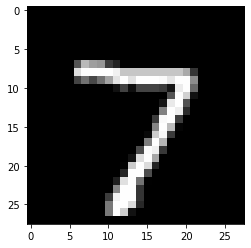

In [ ]:
plt.imshow(test_data[0].reshape(28,28), cmap='gray')

In [ ]:
test_data.shape

(10000, 28, 28, 1)

In [ ]:
image = test_data[0]
image = image.reshape(1, 28, 28, 1)
image.shape

(1, 28, 28, 1)

In [ ]:
# Notice that we reshape the original image
encoded_image = encoder.predict(image).reshape(1, -1)

1/1 [==============================] - 0s 19ms/step


In [ ]:
encoded_image.shape, encoded_image

((1, 1568),
 array([[0.22036412, 0.8689743 , 0.        , ..., 1.3790609 , 0.57008064,
         1.3687414 ]], dtype=float32))

### **Plot the encoded image**

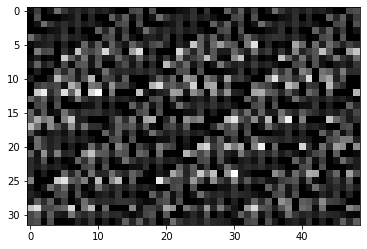

In [ ]:
plt.imshow(encoded_image.reshape(32,49), cmap='gray')

## **6. Decoding the encoded image**

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential, Model

decoder = Model(inputs = autoencoder.get_layer('conv2d_transpose').input , outputs = autoencoder.get_layer('conv2d_2').output)

decoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 7, 7, 32)]        0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       9248      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         289       
                                                                 
Total params: 18,785
Trainable params: 18,785
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_image.shape

(1, 1568)

In [ ]:
autoencoder.get_layer('conv2d_1').output

<KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'conv2d_1')>

In [ ]:
encoded_image = encoded_image.reshape(7, 7, 32)

In [ ]:
encoded_image.shape

(7, 7, 32)

In [ ]:
encoded_image = encoded_image.reshape(1, 7, 7, 32)
encoded_image.shape

(1, 7, 7, 32)

In [ ]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 74ms/step


In [ ]:
decoded_image.shape

(1, 28, 28, 1)

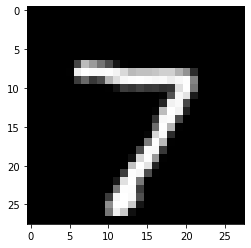

In [ ]:
plt.imshow(decoded_image.reshape(28,28), cmap='gray')

## **6. Get our Autoencoder Predictions**


313/313 [==============================] - 1s 2ms/step


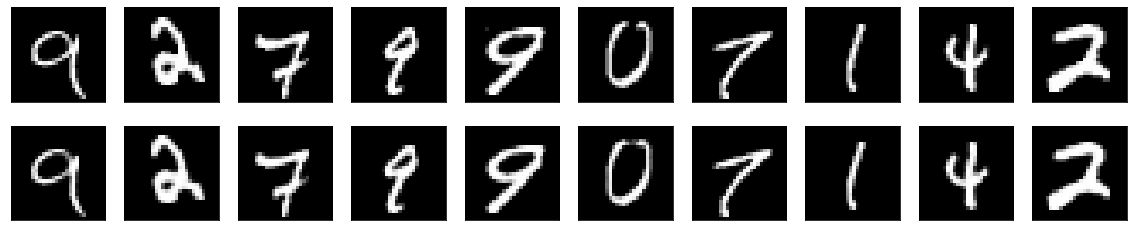

In [ ]:
# We will predict our test dataset
predictions = autoencoder.predict(test_data)

# Display the original image together with the prediction from our autoencoder
display(test_data, predictions)

### **Display the encoding and the decoding images**

1/1 [==============================] - 0s 28ms/step


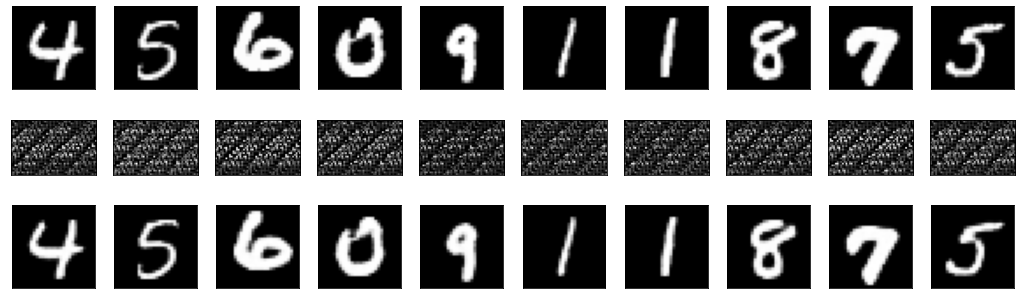

In [ ]:
n_images = 10
test_images = np.random.randint(0, test_data.shape[0] - 1, size = n_images)
#print(test_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  #print(i, image_index)
  # Original image
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(test_data[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10,i + 1 + n_images)
  #encoded_image = encoder.predict(test_data[image_index].reshape(1,-1))
  encoded_image = encoder.predict(test_data[image_index].reshape(1,28, 28, 1))
  plt.imshow(encoded_image.reshape(32, 49), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

## **7. Autoencoder as a Denoiser**


In [ ]:
# We will use noisy_train_data as our input and cleaen data as our target. 
# We will use noisy_test_data as our validation this teaches our autoencoder
# to learn how to denoise the images.
autoencoder.fit(x=noisy_train_data,
                y=train_data,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(noisy_test_data, test_data),)

## **8. Now let's evaluate it's performance on our noisy Test Data**

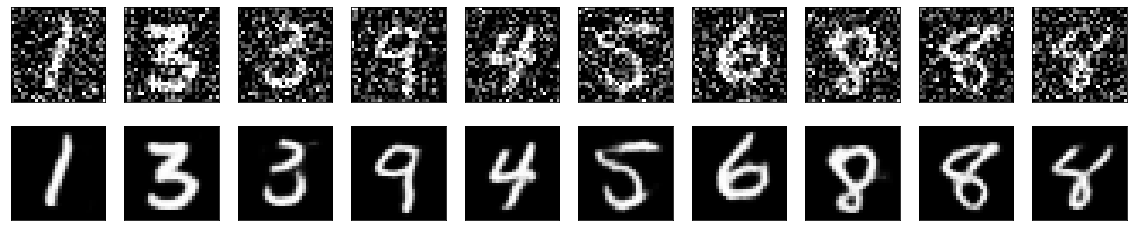

In [ ]:
# We will predict our noisy test dataset
predictions = autoencoder.predict(noisy_test_data)

# Display the original image together with the prediction from our autoencoder
display(noisy_test_data, predictions)